<a href="https://colab.research.google.com/github/piquelab/popgen-notes/blob/master/colab/Copy_of_WF_loss_of_het.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loss of heterozygosity due to drift
---

This google colab is created from Graham Coop code [here](https://github.com/cooplab/popgen-notes/blob/master/Rcode/Genetic_drift/WF_loss_of_het.R)



In [1]:
wf <- function(N, ngens, p0=1/3, mu=0) {
 N <- 2*N  # diploid adjustment
 # initialize an empty matrix
 gns <- matrix(NA, nrow=ngens, ncol=N)
 # initialize the first generation, with two alleles, one at freq
 # p0
 alleles <- 2
 gns[1, ] <- sample(1:2, N, replace=TRUE, prob=c(p0, 1-p0))
 for (i in 2:ngens) {
  gns[i, ] <- gns[i-1, sample(1:N, N, replace=TRUE)]
  if (mu > 0) {
    # add mutations to this generation
    muts <- rbinom(N, 1, prob=mu)
    new_alleles <- sum(muts)
    alleles <- alleles + new_alleles
    if (new_alleles) {
      # there are mutations, add to population.
      gns[i, ] <- ifelse(muts, sample(alleles), gns[i, ])
    }
  }
 }
 gns
}

het <- function(x) {
 tbl <- table(x)
 1 - sum((tbl/sum(tbl))^2)
}


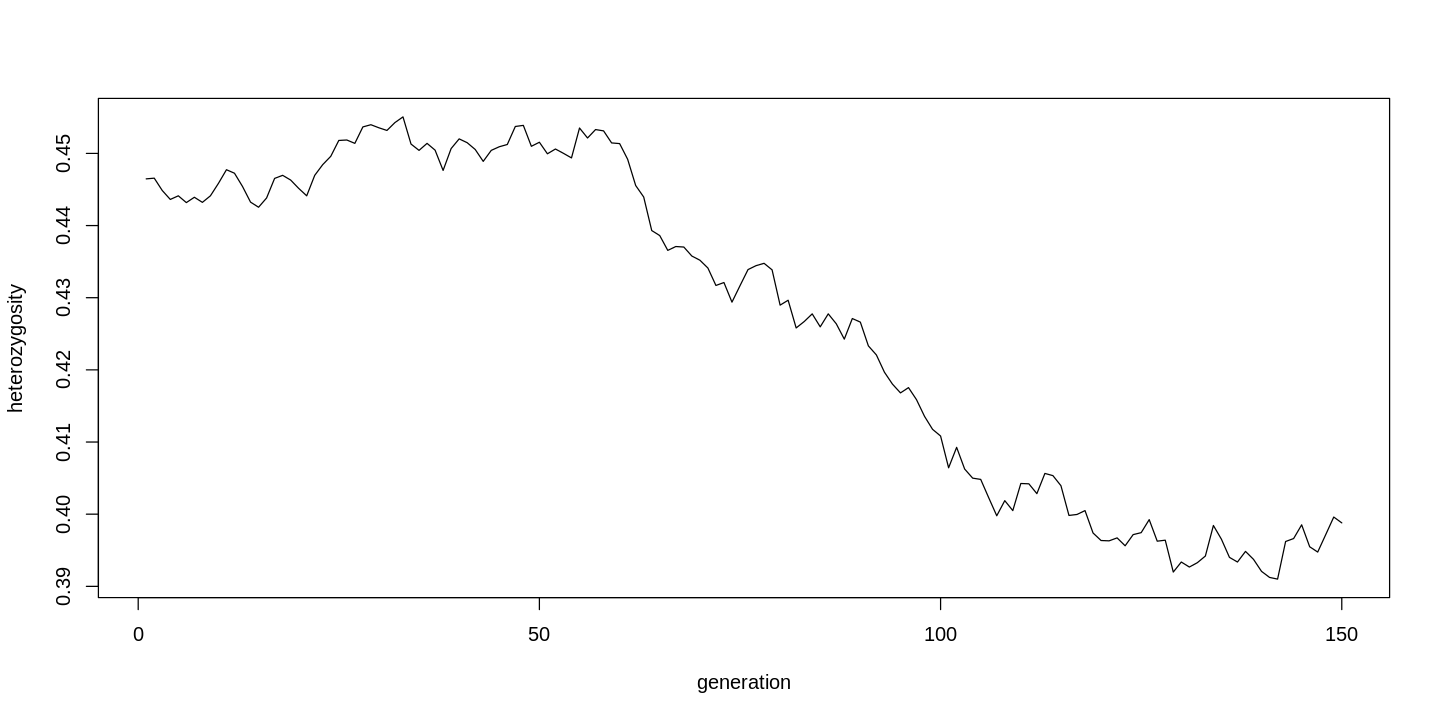

In [18]:
my.sims<-replicate(100,wf(N=100, ngens=150))

h <- apply(my.sims, 1, het)
##options(fig.width = 100)
options(repr.plot.width=12, repr.plot.height=6)
plot(h, type='l', xlab='generation', ylab='heterozygosity')


NULL

NULL

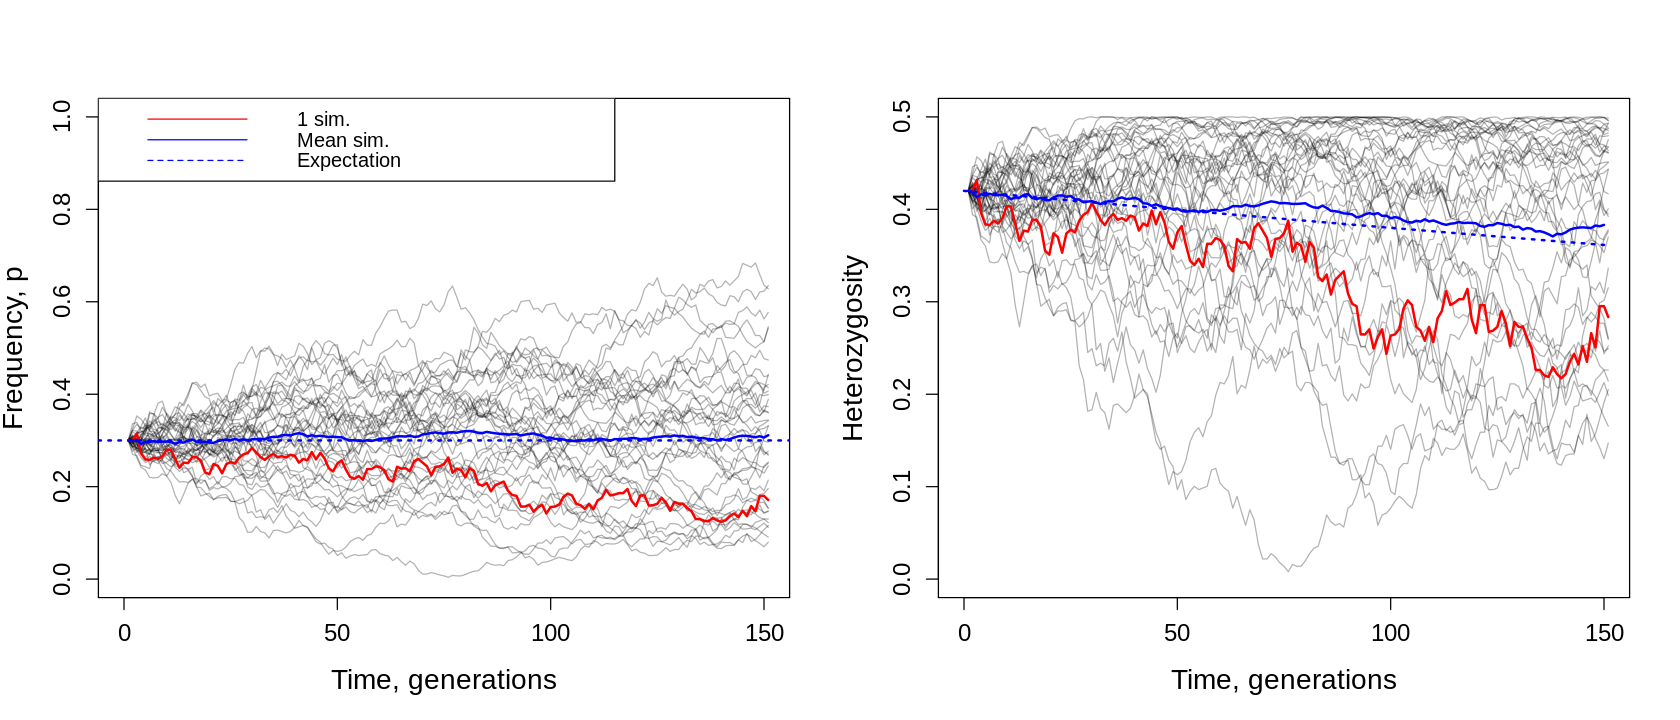

In [23]:
p0<-0.3
N<-500
ngens<-150
my.sims<-replicate(40,wf(N=N, ngens=ngens,p0=p0))

options(repr.plot.width=14, repr.plot.height=6)
layout(t(1:2))

plot(type="n",y=c(0,1),x=c(0,ngens),xlab="Time, generations",ylab="Frequency, p", cex.lab=1.4,cex.axis=1.2)
apply(my.sims,3,function(sim){
	lines(c(p0,apply(sim==1,1,mean)),,col=adjustcolor("black",0.3))
	})
lines(c(p0,apply(my.sims[,,1]==1,1,mean)),col="red",lwd=2)
 lines(rowMeans(apply(my.sims,3,function(sim){c(p0,apply(sim==1,1,mean))})),col="blue",lwd=2)
abline(h=p0,col="blue",lwd=2,lty=3)
legend(x="topleft",legend=c("1 sim.","Mean sim.","Expectation"),col=c("red","blue","blue"),lty=c(1,1,2),bg="white")
plot(type="n",y=c(0,0.5),x=c(0,ngens),xlab="Time, generations",ylab="Heterozygosity", cex.lab=1.4,cex.axis=1.2)
apply(my.sims,3,function(sim){
	lines(c(2*p0*(1-p0),apply(sim,1,het)),col=adjustcolor("black",0.3))
	})
lines(c(2*p0*(1-p0),apply(my.sims[,,1],1,het)),col="red",lwd=2)
 lines(rowMeans(apply(my.sims,3,function(sim){apply(sim,1,het)})),col="blue",lwd=2)
 lines(0:ngens,2*p0*(1-p0)*(1-1/(2*N))^(0:ngens),col="blue",lty=3,lwd=2)
